<a href="https://colab.research.google.com/github/ARPIT-SINGHAL-22102003/DATA_SCIENCE/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING OS AND DISPLAYING FILES**

In [13]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/phishing_site_urls.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**INSTALLING SELENIUM**

In [14]:
%pip install selenium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


**IMPORTING LIBRARIES**

In [15]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline
# It sets the backend of matplotlib to the 'inline' backend:
import plotly.express as px
import time # calculate time

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model

import warnings # ignores pink warnings
warnings.filterwarnings('ignore')

**LOADING THE DATA**

In [16]:
phish_data = pd.read_csv('./content/phishing_site_urls.csv')

**VIEWING THE TOP ROWS OF THE DATA SET**

In [17]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


**VIEWING THE BOTTOM ROWS OF THE DATASET**

In [18]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


**OVERVIEW OF THE DATAFRAME STRUCTURE**

In [19]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


**DATA CLEANING**

**CHECKING FOR THE MISSING VALUES**

In [20]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

**COUNT OF EACH CLASS LABEL**

In [21]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

**DATA TRANSFORMATION**

**INITAIALIZING TOKENIZER**

In [22]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')#to getting alpha only

**LOOK AT THE FIRST URL**

In [23]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

**APPLYING TOKENIZER TO THE FIRST URL**

In [24]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

**TOKENIZING ALL THE ROWS**

In [25]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 1.9388696999958484 sec


**SHOW RANDOM SAMPLE OF DATA**

In [26]:
phish_data.sample(5)

,URL,Label,text_tokenized
334158,famouswhy.com/List/c/Pornographic_film_actors_...,good,"[famouswhy, com, List, c, Pornographic, film, ..."
405181,nimanranch.com/contactus.aspx,good,"[nimanranch, com, contactus, aspx]"
59797,www.informationweek.com/news/development/datab...,good,"[www, informationweek, com, news, development,..."
148841,bestantiagingwrinklecreams.com/?nsearch=Blaine...,good,"[bestantiagingwrinklecreams, com, nsearch, Bla..."
441484,takeouttonight.com/menus/kansas/hays/index.html,good,"[takeouttonight, com, menus, kansas, hays, ind..."


**INITIALIZING STEMMER**

In [27]:
stemmer = SnowballStemmer("english") # choose a language

**APPLYING STEMMING TO TOKENIZED WORDS**

In [28]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 35.208492300000216 sec


**SAMPLE AFTER STEMMING**

In [29]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
36449,www.officemix.ge/components/com_virtuemart/the...,bad,"[www, officemix, ge, components, com, virtuema...","[www, officemix, ge, compon, com, virtuemart, ..."
134901,gadarikids.com/pub/login.jsp.php,bad,"[gadarikids, com, pub, login, jsp, php]","[gadarikid, com, pub, login, jsp, php]"
113973,walterpayne.org/ssll/new.php?cmd=login_submit&...,bad,"[walterpayne, org, ssll, new, php, cmd, login,...","[walterpayn, org, ssll, new, php, cmd, login, ..."
392763,moviesplanet.com/movies/513/pitch-black,good,"[moviesplanet, com, movies, pitch, black]","[moviesplanet, com, movi, pitch, black]"
483003,secure.grantbooks.com/,good,"[secure, grantbooks, com]","[secur, grantbook, com]"


**JOINING STEMMED TOKENS INTO SENTENCE STRINGS**

In [30]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.19464800000423566 sec


**SAMPLE AFTER JOINING WORDS**

In [31]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
464833,willandwillie.com/,good,"[willandwillie, com]","[willandwilli, com]",willandwilli com
275333,amazon.com/Greenberg-Ben-Stiller/dp/B002ZG97T2,good,"[amazon, com, Greenberg, Ben, Stiller, dp, B, ...","[amazon, com, greenberg, ben, stiller, dp, b, ...",amazon com greenberg ben stiller dp b zg t
233743,rcmmindex.blogspot.com/2011/11/st-patrick-trav...,good,"[rcmmindex, blogspot, com, st, patrick, traver...","[rcmmindex, blogspot, com, st, patrick, traver...",rcmmindex blogspot com st patrick travers citi...
459434,videosurf.com/larry-carriere-145187,good,"[videosurf, com, larry, carriere]","[videosurf, com, larri, carrier]",videosurf com larri carrier
95066,membres.multimania.fr/gpk/,good,"[membres, multimania, fr, gpk]","[membr, multimania, fr, gpk]",membr multimania fr gpk


**EXPLORATORY DATA ANALYSIS**

**SPLITTING THE DATASET BY LABELS**

In [32]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

**PREVIEW BAD URLs**

In [33]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


**PREVIEW GOOD URLs**

In [34]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


**LABEL COUNT VISUALIZATION**

In [35]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())
# Rename the 'count' column to 'Label' for consistency
label_counts = label_counts.rename(columns={'count': 'Label'}) # Rename the count column to Label

#visualizing target_col
fig = px.bar(label_counts, x=label_counts.index, y=label_counts.Label)
fig.show()

**DEFINE FUNCTION TO PLOT A WORD CLOUD**

In [36]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()
d = '/content/mask/mask-wordclouds'

**PREPARE text_sent DATA FROM GOOD URLs**

In [37]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

**CONVERTING GOOD URL TEXT DATA TO STRING AND THEN GENERATING A WORD CLOUD**

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


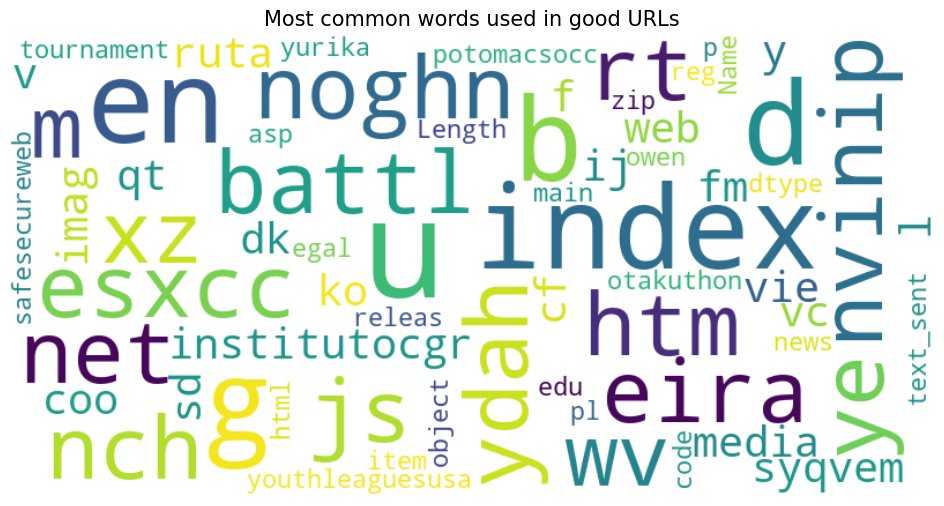

In [38]:
%pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert your data to string
common_text = str(data)

# Create the word cloud without a mask
wordcloud = WordCloud(width=800, height=400, max_words=400, max_font_size=120,
                      background_color='white').generate(common_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most common words used in good URLs', fontsize=15)
plt.show()


**ASSIGN BAD URL TEXT DATA TO DATA AND RESET INDEX**

In [39]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

**GENERATING THE WORD CLOUD FOR BAD URLs**

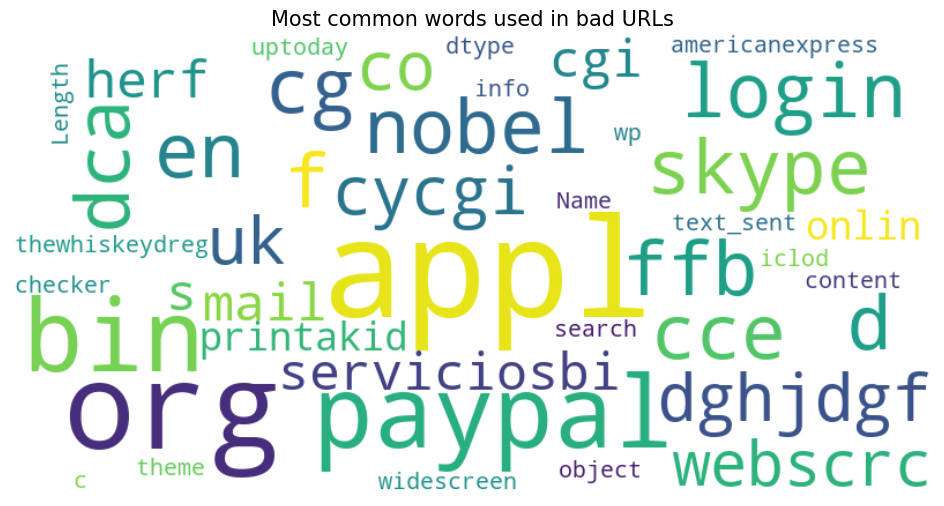

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert your data to string
common_text = str(data)

# Generate the word cloud (no mask)
wordcloud = WordCloud(width=800, height=400, max_words=400, max_font_size=120,
                      background_color='white').generate(common_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most common words used in bad URLs', fontsize=15)
plt.show()


**FEATURE ENGINEERING**

**CREATE COUNTVECTORIZER OBJECT**

In [41]:
#create cv object
cv = CountVectorizer()

**OPTIONAL HELP INFORMATIN**

In [42]:
help(CountVectorizer())

Help on CountVectorizer in module sklearn.feature_extraction.text object:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |
 |  Convert a collection of text documents to a matrix of token counts.
 |
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |
 |  For an efficiency comparison of the different feature extractors, see
 |  :ref:`sphx_glr_auto_exam

**TRANSORM FULL DATASET TEXT INTO BAG OF WORDS**

In [43]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

**PREVIEWING THE FORST FEW TRANSFORMED VECTORS**

In [44]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**DATASET SPLITTING**

**SPLITTING THE DATASET INTO TRAINING AND TESTING SETS**

In [45]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

**TRAINING THE LOGISTIC REGRESSION MODEL**

In [46]:
# create lr object
lr = LogisticRegression()

In [47]:
lr.fit(trainX,trainY)

LogisticRegression()

**EVALUATING THE LOGISTIC REGRESSION ACCURACY**

In [48]:
lr.score(testX,testY)

0.9655955787588195

**STORING MODEL ACCURACY**

In [49]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

**Evaluating Logistic Regression Model Performance**

Training Accuracy : 0.9796630656126444
Testing Accuracy : 0.9655955787588195

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36574
        Good       0.99      0.96      0.98    100763

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

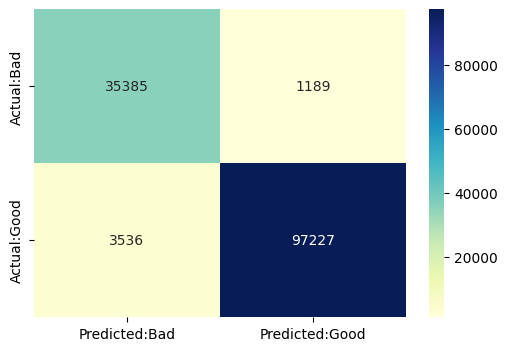

In [50]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

**CREATING A MULTINOMIAL NAIVE BAYES(MNB) CLASSIFIER** 

In [51]:
# create mnb object
mnb = MultinomialNB()

In [52]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [53]:
mnb.score(testX,testY)

0.9588020708184976

In [54]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9739593067141737
Testing Accuracy : 0.9588020708184976

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.94      0.93     37959
        Good       0.98      0.97      0.97     99378

    accuracy                           0.96    137337
   macro avg       0.95      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

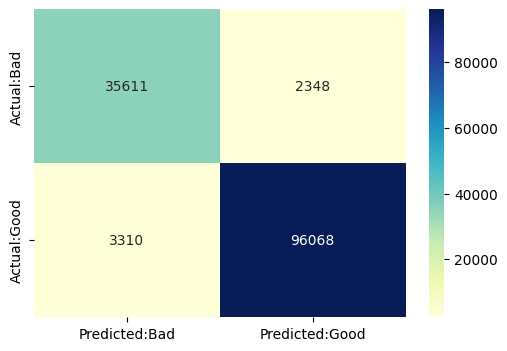

In [55]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<Axes: xlabel='None', ylabel='Accuracy'>

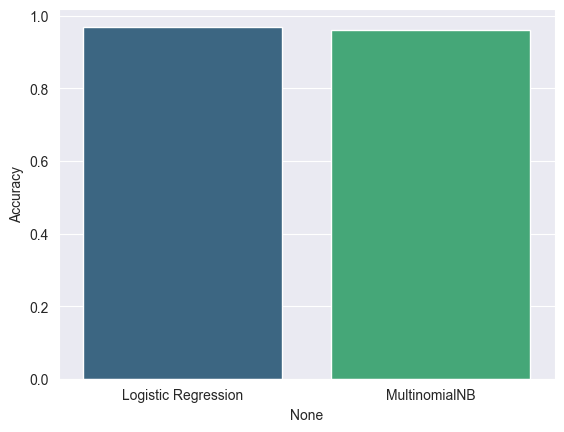

In [56]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(x=acc.index, y=acc.Accuracy, palette="viridis") # Using the "viridis" palette

**PIPELINE CREATION**

In [57]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+)  -- these tolenizers giving me low accuray

In [58]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [59]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [60]:
pipeline_ls.score(testX,testY)

0.9669353488135025

Training Accuracy : 0.980565958510615
Testing Accuracy : 0.9669353488135025

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36914
        Good       0.99      0.97      0.98    100423

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

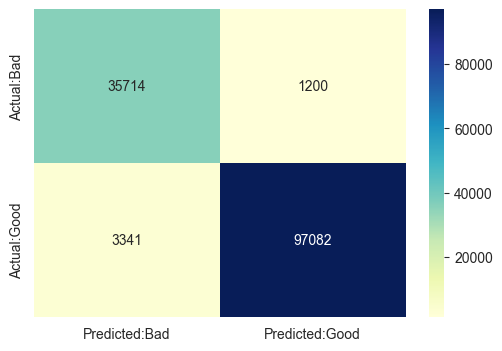

In [61]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

**Model Saving and Deployment**

In [62]:
import pickle  # ✅ This is all you need!

# Save your pipeline to a file
with open('phishing.pkl', 'wb') as f:
    pickle.dump(pipeline_ls, f)


In [63]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9669353488135025


In [64]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']
